The wine dataset you provided consists of various features (or variables) related to different chemical properties of wines. Each row or observation in the dataset represents a different wine sample. The columns or variables in the dataset represent different characteristics of these wine samples, such as:

1.Alcohol content (measured in percentage).
2.Malic acid content (measured in grams per liter).
3.Ash content (measured in grams per liter).
4.Alcalinity of ash (measured in units of pH).
5.Magnesium content (measured in milligrams per liter).
6.Total phenols content (measured in milligrams per liter).
7.Flavanoids content (measured in milligrams per liter).
8.Nonflavanoid phenols content (measured in milligrams per liter).
9.Proanthocyanins content (measured in milligrams per liter).
10.Color intensity (measured in absorbance units).
11.Hue (measured in degrees).
12.OD280/OD315 of diluted wines (unitless).
13.Prolin content (measured in milligrams per liter). 



In [1]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Import necessary libraries
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from scipy.cluster.hierarchy import dendrogram, linkage
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_wine
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [3]:
# Load the wine dataset into a Pandas dataframe
wine = load_wine()
wine_df = pd.DataFrame(wine.data, columns=wine.feature_names)
wine_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [4]:
#Information on features 
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [69]:
# Explore the dataset
display(wine_df.head())
display(wine_df.shape)   # shape of the dataframe
wine_df.describe()   # summary statistics of the dataframe

# This code displays the first few rows of the wine_df DataFrame and prints its shape, which is the number of 
# rows and columns. Finally, it prints some basic statistics of the DataFrame, including count, mean, standard 
# deviation, minimum, maximum, and quartile values for each column. This helps to get a general idea of the 
# dataset's features and their distribution.

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


(178, 13)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [70]:
# Add the target variable to the dataframe
wine_df['target'] = wine.target

# Print some basic statistics of the dataframe
display(wine_df.describe())

# The code adds the target variable (wine class) to the existing wine_df dataframe. It then prints some basic 
# statistics of the dataframe using the describe() function, such as count, mean, standard deviation, minimum
# and maximum values, and quartiles.

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [80]:
# Instantiate KMeans model with 3 clusters
kmeans = KMeans(n_clusters=3)

# Fit the model to the wine dataset
kmeans.fit(wine_df)

# Add cluster labels to the original dataset
wine_df['cluster'] = kmeans.labels_

wine_df

# The code uses KMeans clustering algorithm to cluster the wine dataset into 3 clusters. The resulting dataset 
# contains the original wine data along with the assigned cluster labels.

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,cluster
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,1
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,1
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,1
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,1


In [82]:
wine_df[(wine_df["cluster"]== 0)].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47 entries, 0 to 73
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       47 non-null     float64
 1   malic_acid                    47 non-null     float64
 2   ash                           47 non-null     float64
 3   alcalinity_of_ash             47 non-null     float64
 4   magnesium                     47 non-null     float64
 5   total_phenols                 47 non-null     float64
 6   flavanoids                    47 non-null     float64
 7   nonflavanoid_phenols          47 non-null     float64
 8   proanthocyanins               47 non-null     float64
 9   color_intensity               47 non-null     float64
 10  hue                           47 non-null     float64
 11  od280/od315_of_diluted_wines  47 non-null     float64
 12  proline                       47 non-null     float64
 13  cluster

In [83]:
wine_df[(wine_df["cluster"]== 1)].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 4 to 176
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       62 non-null     float64
 1   malic_acid                    62 non-null     float64
 2   ash                           62 non-null     float64
 3   alcalinity_of_ash             62 non-null     float64
 4   magnesium                     62 non-null     float64
 5   total_phenols                 62 non-null     float64
 6   flavanoids                    62 non-null     float64
 7   nonflavanoid_phenols          62 non-null     float64
 8   proanthocyanins               62 non-null     float64
 9   color_intensity               62 non-null     float64
 10  hue                           62 non-null     float64
 11  od280/od315_of_diluted_wines  62 non-null     float64
 12  proline                       62 non-null     float64
 13  cluste

In [84]:
wine_df[(wine_df["cluster"]== 2)].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69 entries, 59 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       69 non-null     float64
 1   malic_acid                    69 non-null     float64
 2   ash                           69 non-null     float64
 3   alcalinity_of_ash             69 non-null     float64
 4   magnesium                     69 non-null     float64
 5   total_phenols                 69 non-null     float64
 6   flavanoids                    69 non-null     float64
 7   nonflavanoid_phenols          69 non-null     float64
 8   proanthocyanins               69 non-null     float64
 9   color_intensity               69 non-null     float64
 10  hue                           69 non-null     float64
 11  od280/od315_of_diluted_wines  69 non-null     float64
 12  proline                       69 non-null     float64
 13  clust

Elbow Method to determine the number of clusters to be formed:


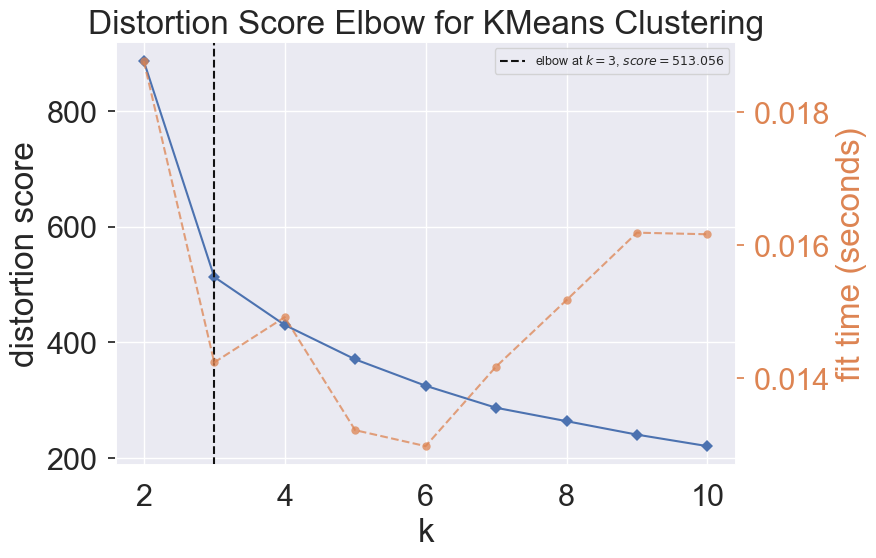

In [102]:
X = wine_df

# Scale wine dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to wine dataset
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# Quick examination of elbow method to find numbers of clusters to make.
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt

print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(X_pca)
Elbow_M.show()

plt.show()

# This code performs dimensionality reduction using Principal Component Analysis (PCA) on the wine dataset, 
# scales the resulting data, and then performs clustering analysis using the K-means algorithm to find the optimal
# number of clusters.

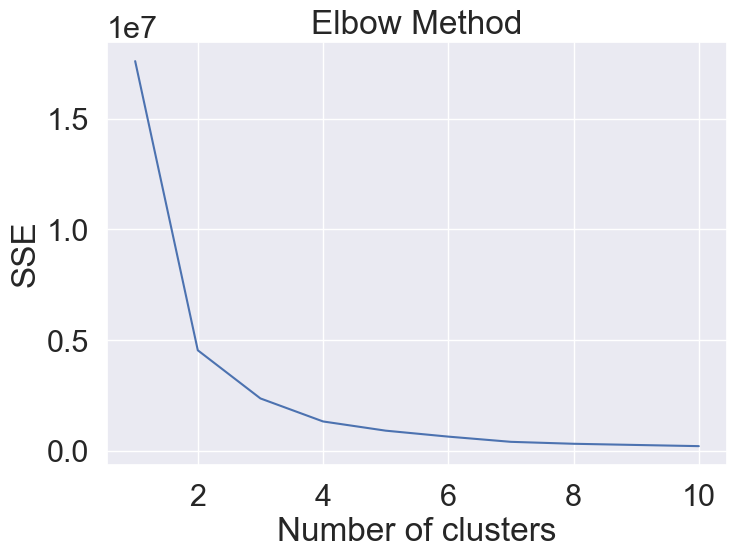

In [73]:
# Define range of number of clusters to test
k_range = range(1, 11)

# Apply KMeans algorithm to each k value and calculate SSE (sum of squared errors)
sse = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

# Plot SSE against number of clusters
plt.plot(k_range, sse, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()

# This code is performing an analysis of clustering using the KMeans algorithm and plotting the results.
# Overall, this code is a common approach for choosing the optimal number of clusters in KMeans clustering analysis.

In [74]:
# Scale the data using StandardScaler
scaler = StandardScaler()
scaled_wine = scaler.fit_transform(wine_df)

# This code applies a common data preprocessing step to a dataset to ensure that the data has zero mean and 
# unit variance.

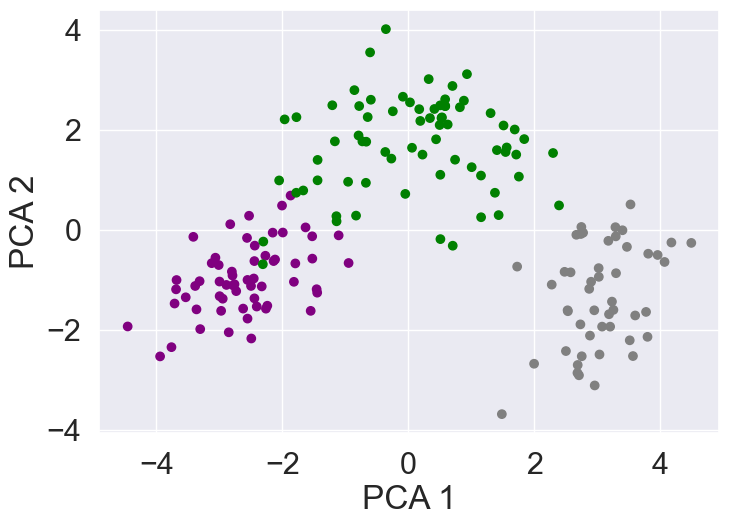

In [75]:
#PCA dimensionality reduction

# Perform PCA
pca = PCA(n_components=2)
pca_wine = pca.fit_transform(scaled_wine)

# Define a new color array based on a different variable
color_array = np.where(wine.target == 0, 'purple', 
              np.where(wine.target == 1, 'green', 'grey'))

# Plot the scatter plot with the new color array
plt.scatter(pca_wine[:,0], pca_wine[:,1], c=color_array)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

# this code performs dimensionality reduction using PCA and visualizes the transformed data in a scatter plot 
# with colors indicating the different targets in the wine dataset.


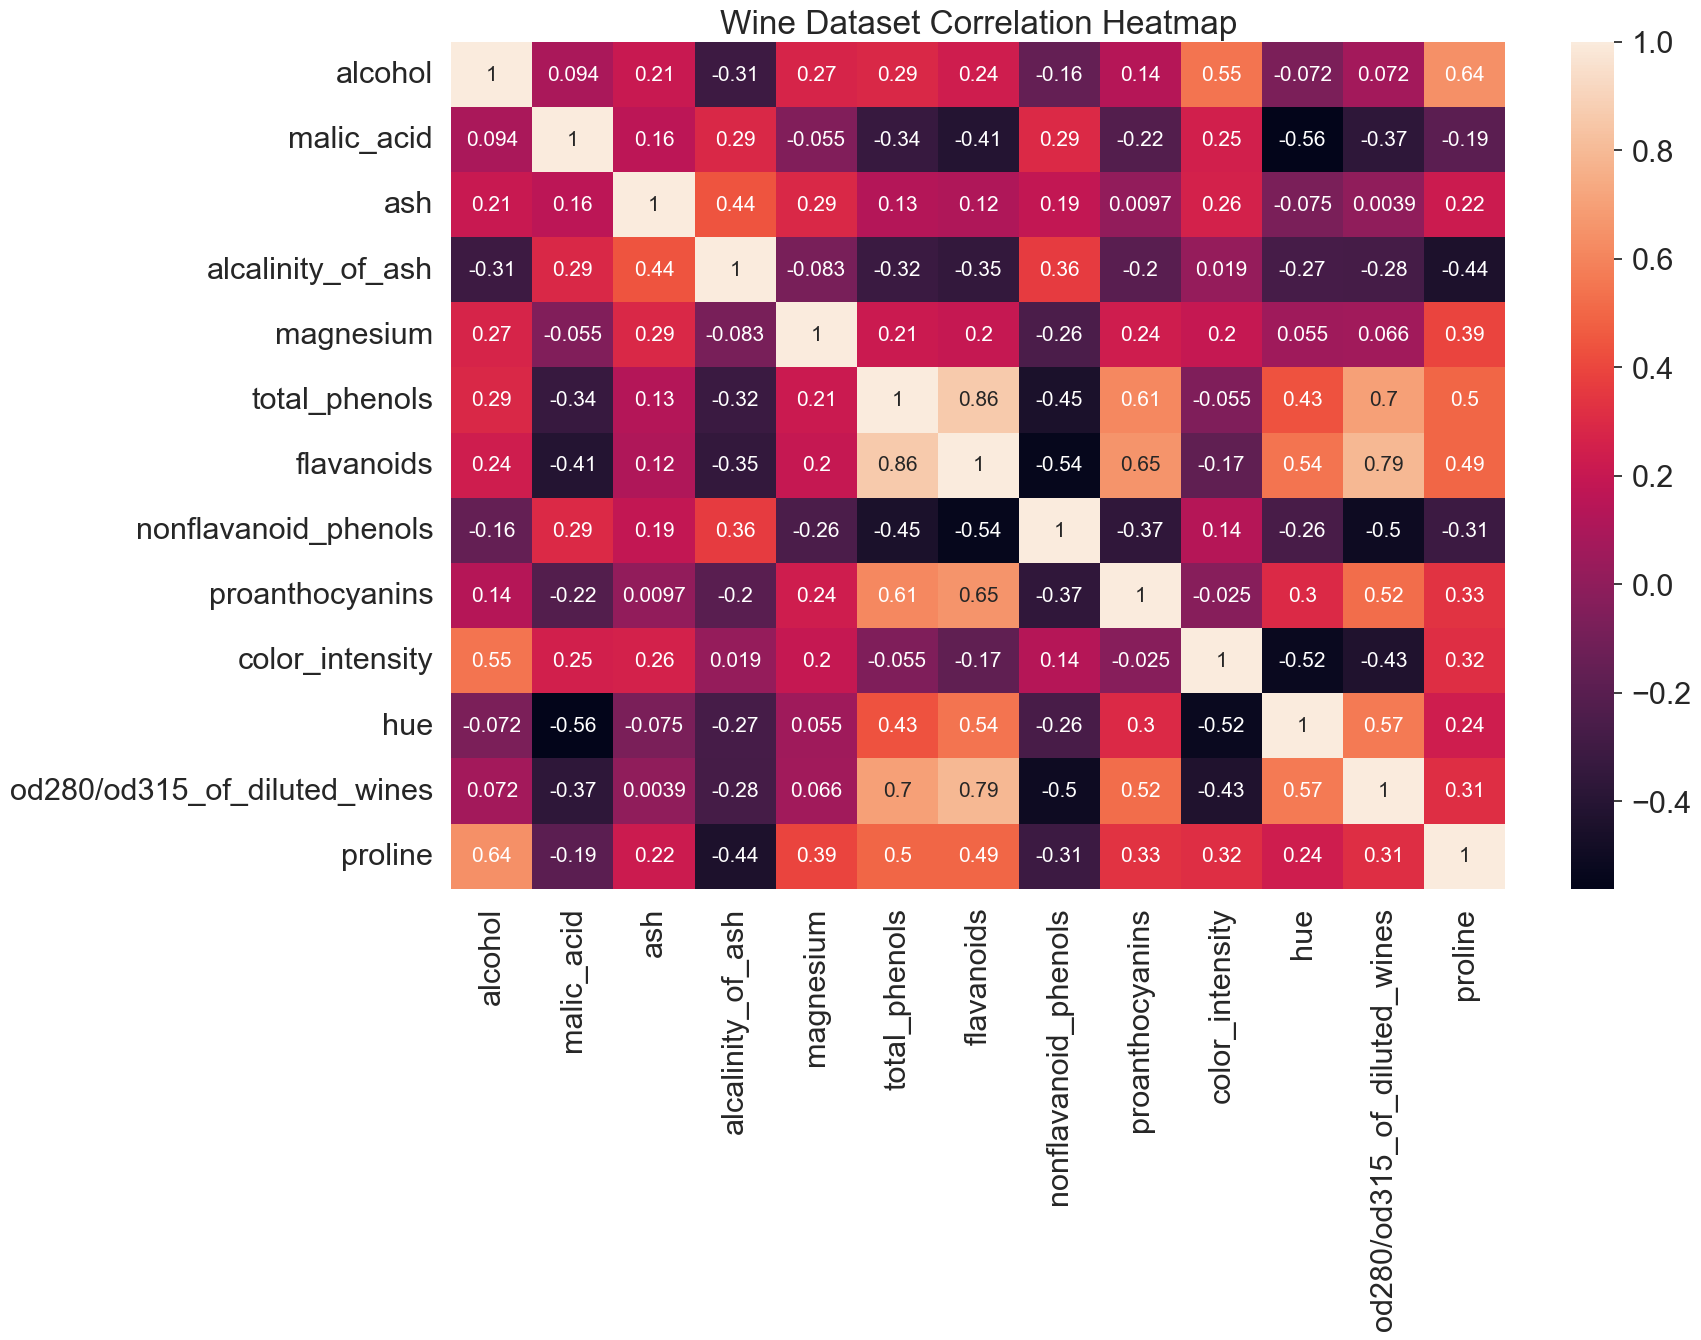

In [101]:
# Convert the dataset to a Pandas dataframe
wine_df = pd.DataFrame(wine.data, columns=wine.feature_names)

# Select the features to plot
features = ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash',
            'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
            'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']

# Compute the correlation matrix
corr_matrix = wine_df[features].corr()

# Create a heatmap with smaller numbers inside
plt.figure(figsize=(17,11))
sns.heatmap(corr_matrix, annot=True, annot_kws={"size": 15})
plt.title('Wine Dataset Correlation Heatmap')
plt.show()



# Show the plot
plt.show()

# this code  creates a heatmap with the correlation matrix using Seaborn's heatmap() method, with smaller numbers 
# inside the cells of the heatmap to indicate the magnitude of the correlation.
# we can see that there is a strong positive correlation between total phenols and flavanoids, while there is a 
# negative correlation between nonflavanoid phenols and flavanoids.

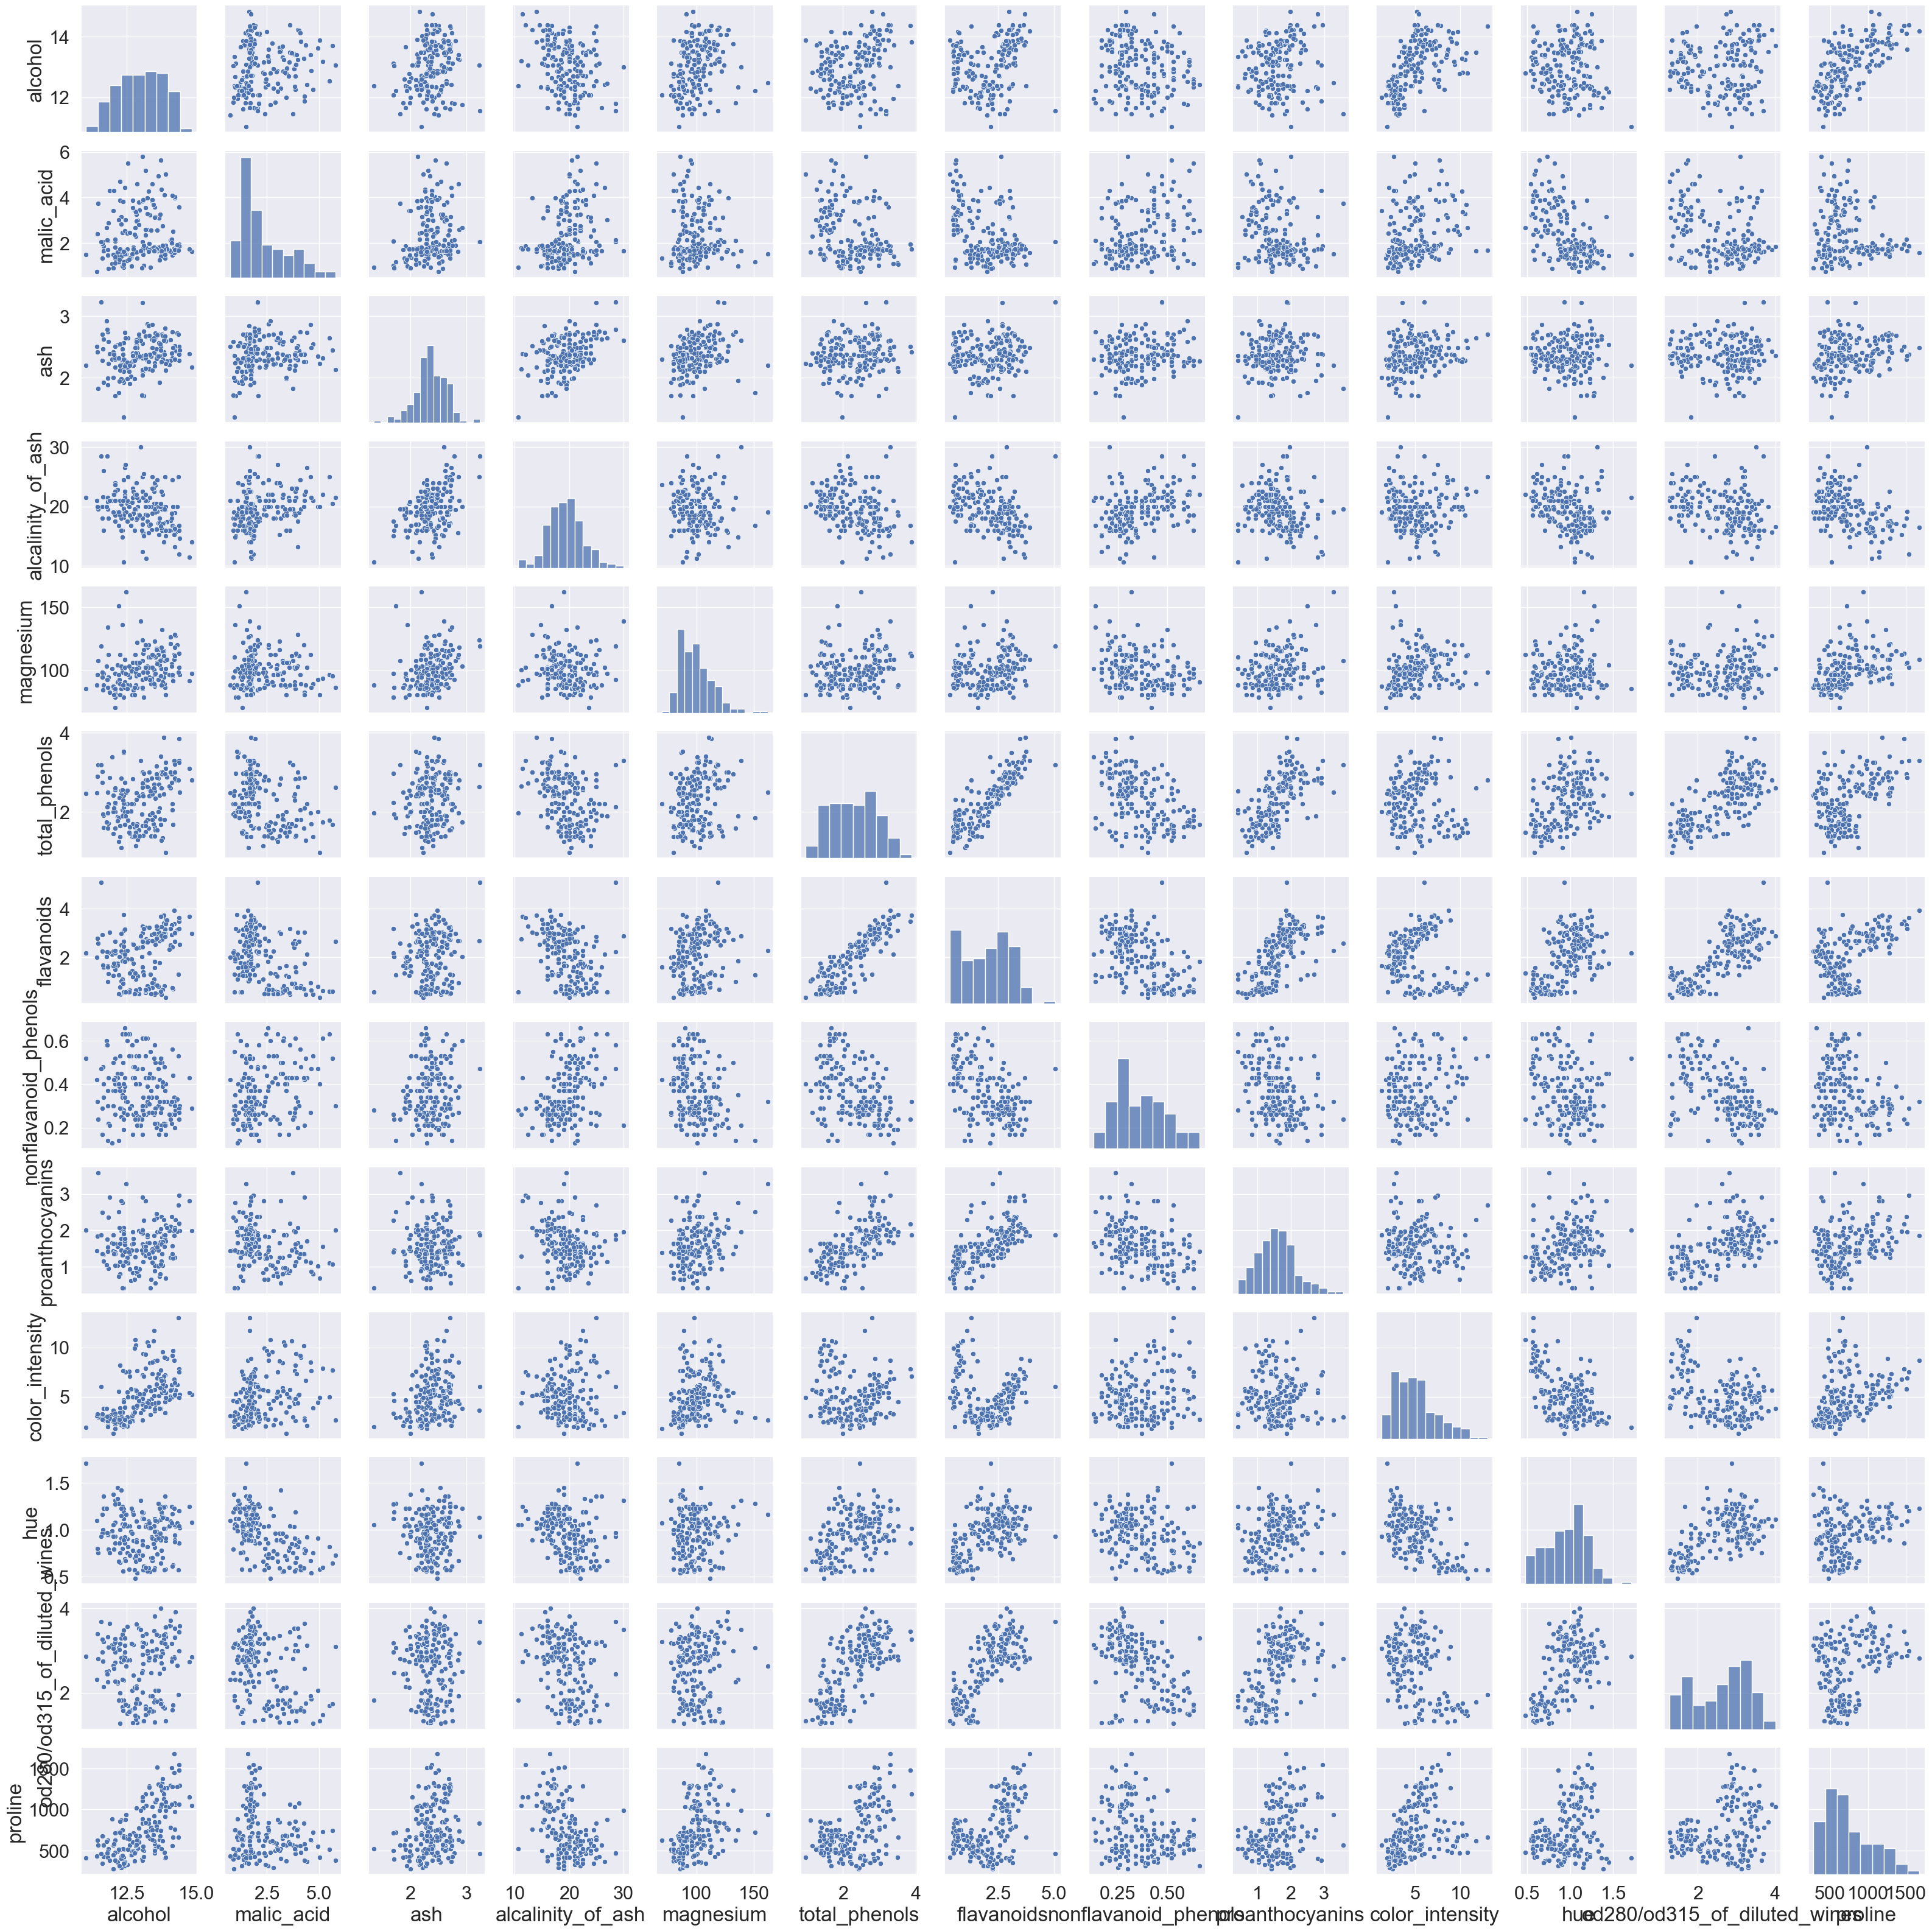

In [77]:
# Visualize the data
sns.pairplot(wine_df) # Create pairwise scatterplots for all variables
plt.show()

# Each plot in the grid shows the relationship between two variables. The diagonal plots show a histogram 
# of each variable.

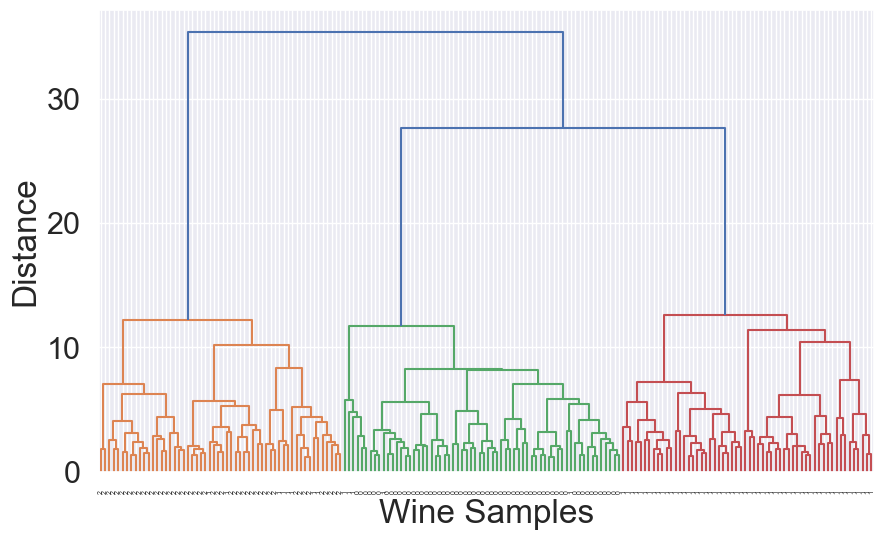

In [78]:
#Hierarchical clustering
# Scale the data
scaler = StandardScaler()
scaled_wine = scaler.fit_transform(wine.data)

# Perform hierarchical clustering
linkage_matrix = linkage(scaled_wine, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, orientation='top', labels=wine.target)
plt.xticks(rotation=90)
plt.xlabel('Wine Samples')
plt.ylabel('Distance')
plt.show()

# The code performs hierarchical clustering on the Wine dataset using the Ward linkage method. The goal of 
# hierarchical clustering is to group similar data points into clusters based on the distances between them. 
# The Ward linkage method is a type of agglomerative hierarchical clustering that minimizes the variance of the 
# distances between the clusters being merged.


[9.98091230e-01 1.73591562e-03 9.49589576e-05]


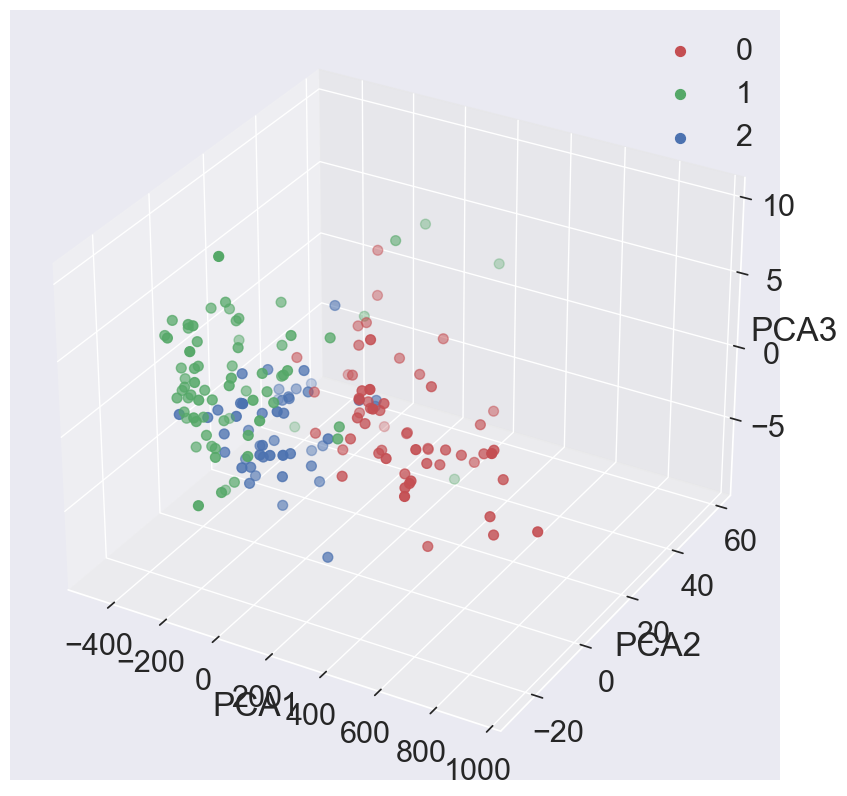

In [108]:
# Apply PCA to wine dataset
pca = PCA(n_components=3)
X_pca = pca.fit_transform(wine.data)
print(pca.explained_variance_ratio_)

# Plot the 3D projection
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
targets = np.unique(wine.target)
colors = ['r', 'g', 'b']
for target, color in zip(targets, colors):
    indicesToKeep = np.where(wine.target == target)[0]
    ax.scatter(X_pca[indicesToKeep, 0], X_pca[indicesToKeep, 1], X_pca[indicesToKeep, 2], c=color, s=50)
ax.legend(targets)
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
plt.show()

# The code applies PCA (Principal Component Analysis) to reduce the dimensionality of the wine dataset to 3 
# components. It then plots a 3D projection of the reduced dataset, with each class (target) represented by a 
# different color.

The first component (PCA1) explains 99.8% of the variance in the original dataset, while the second and third components (PCA2 and PCA3) explain only 0.17% and 0.0095% of the variance, respectively. This means that most of the variance in the original dataset is captured by the first principal component, and the remaining two components explain very little additional variance.

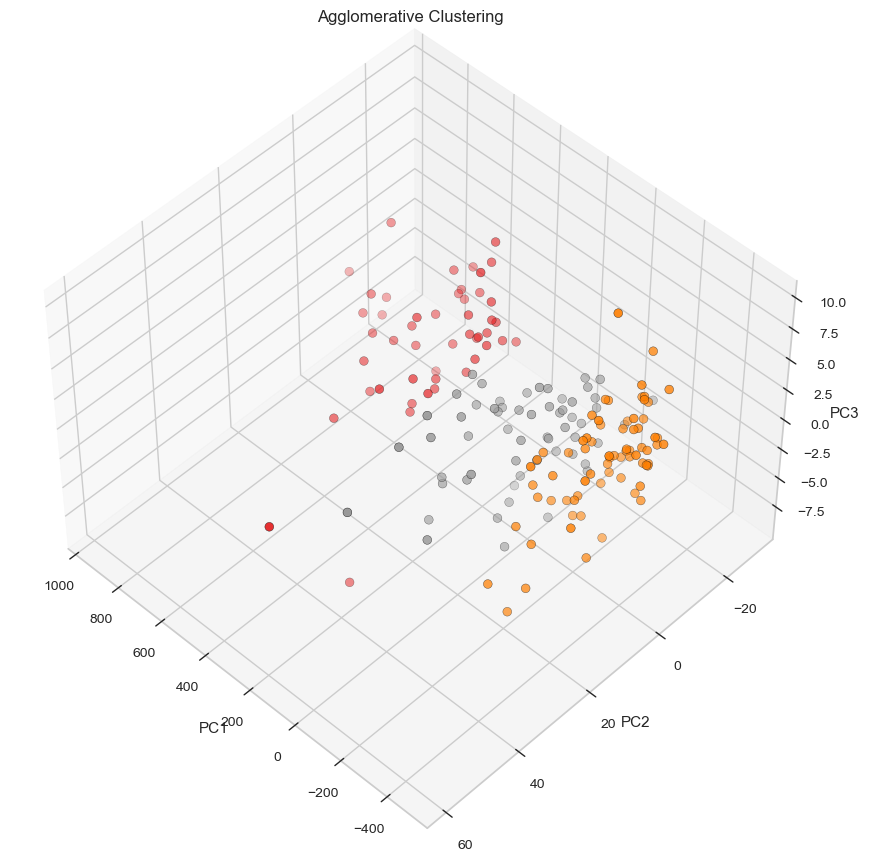

In [16]:
# Separate the features and target variable
X = wine.data
y = wine.target

# Apply PCA to wine dataset
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# Initialize the Agglomerative Clustering model with 3 clusters
AC = AgglomerativeClustering(n_clusters=3)

# Fit the model and predict clusters
yhat_AC = AC.fit_predict(X_pca)

# Add the Clusters feature to the original dataframe.
wine["Clusters"] = yhat_AC 

# Plot the clusters
fig = plt.figure(figsize=(10,8))
ax = Axes3D(fig, auto_add_to_figure=False, rect=[0, 0, .95, 1], elev=48, azim=134)
fig.add_axes(ax)
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=yhat_AC, cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("Agglomerative Clustering")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.show()

# The code applies PCA (Principal Component Analysis) to reduce the dimensionality of the wine dataset to 3 
# components. It then applies Agglomerative Clustering to the reduced dataset with 3 clusters. The resulting 
# clusters are added as a new feature to the original dataset, and a 3D scatter plot is created to visualize the 
# clusters, with each cluster represented by a different color.

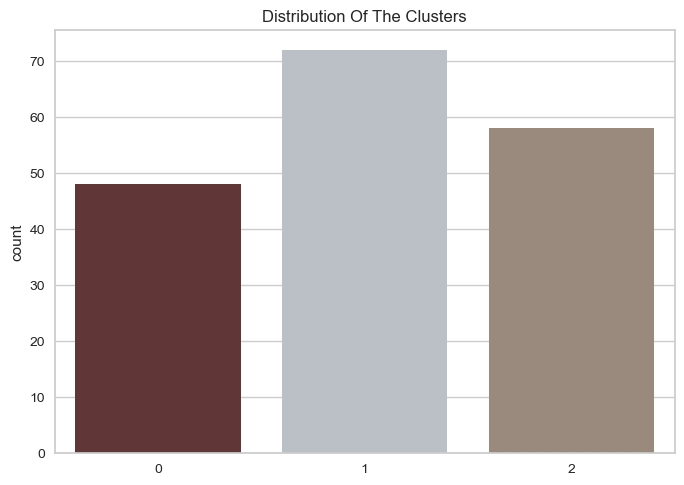

In [17]:
# Set color palette
pal = ["#682F2F","#B9C0C9", "#9F8A78"]

# Plot countplot
pl = sns.countplot(x=wine["Clusters"], palette=pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

# The code sets a custom color palette and uses it to create a countplot of the "Clusters" column in the wine 
# dataset. The resulting plot shows the distribution of the different clusters in the dataset.

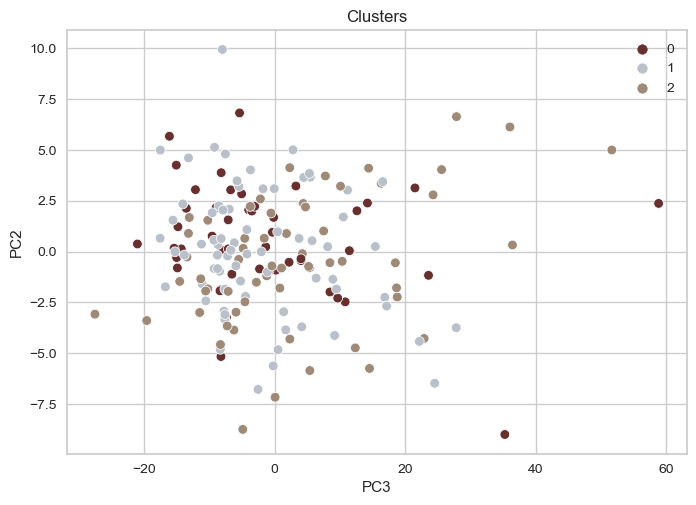

In [18]:
# Create scatter plot of clusters
fig, ax = plt.subplots()
pl = sns.scatterplot(data = wine_df, x=X_pca[:,1], y=X_pca[:,2], hue=wine["Clusters"], palette=pal)
pl.set_title("Clusters")
plt.legend()
ax.set_xlabel("PC3")
ax.set_ylabel("PC2")
plt.show()

# This code creates a scatter plot of the wine dataset using the reduced dimensionality from PCA. The scatter 
# plot shows the values of the second and third principal components, and the points are colored according to 
# the clusters that were formed using the K-Means algorithm. The plot is labeled and titled, and a legend is 
# added to show the cluster colors.

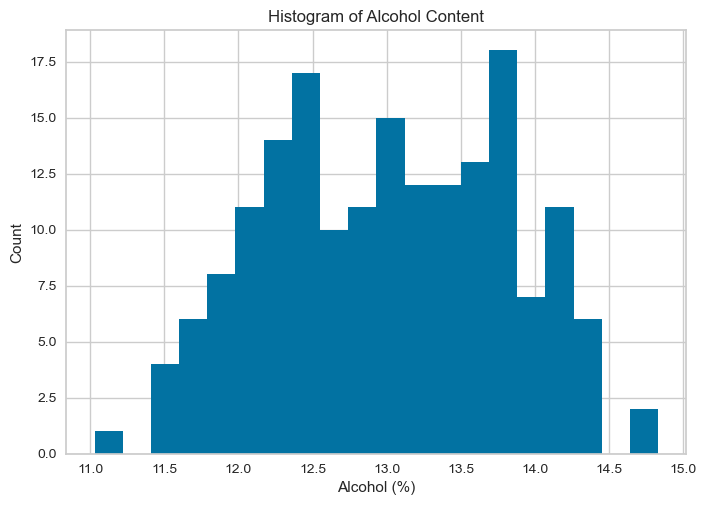

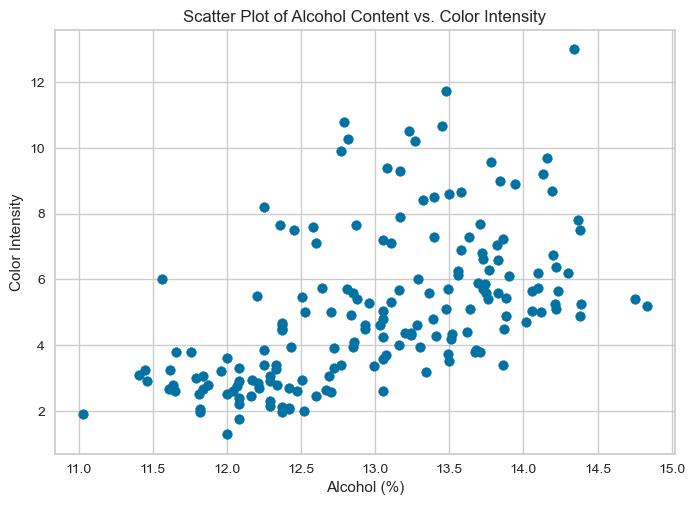

,color_intensity,alcohol
color_intensity,1.000000,0.546364
alcohol,0.546364,1.000000


In [19]:
# Plot a histogram of the alcohol content
plt.hist(wine_df['alcohol'], bins=20)
plt.title('Histogram of Alcohol Content')
plt.xlabel('Alcohol (%)')
plt.ylabel('Count')
plt.show()

# Plot a scatter plot of alcohol content vs. color intensity
plt.scatter(wine_df['alcohol'], wine_df['color_intensity'])
plt.title('Scatter Plot of Alcohol Content vs. Color Intensity')
plt.xlabel('Alcohol (%)')
plt.ylabel('Color Intensity')
plt.show()

# Calculate the correlation matrix for the dataset
corr_matrix = wine_df.corr()

display(corr_matrix.loc[['color_intensity', 'alcohol'], ['color_intensity', 'alcohol']]
)

#  It then plots a scatter plot of the alcohol content versus color intensity, with alcohol percentage on 
# the x-axis and color intensity on the y-axis. Finally, it calculates and displays the correlation matrix 
# between alcohol content and color intensity.

In [20]:
# Calculate the correlation between total phenols and flavanoids content
corr = wine_df['total_phenols'].corr(wine_df['flavanoids'])

# Print the correlation coefficient
print(f"Correlation between total phenols and flavanoids content: {corr:.3f}")

# The correlation coefficient indicates the strength and direction of the linear relationship between the 
# two variables. The result is then printed out to the console, formatted as a string with three decimal places.
# This means that as the content of one variable increases, the content of the other variable tends to increase 
# as well, and vice versa. Therefore, we can conclude that there is a strong association between the total phenols 
# and flavanoids content in the wine dataset.

Correlation between total phenols and flavanoids content: 0.865


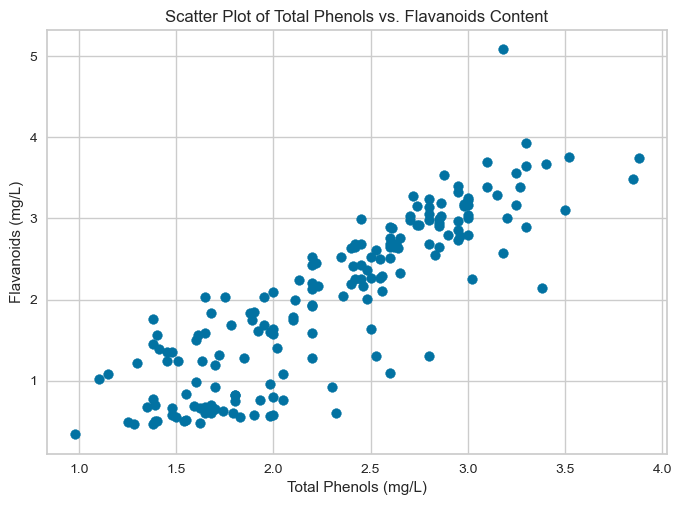

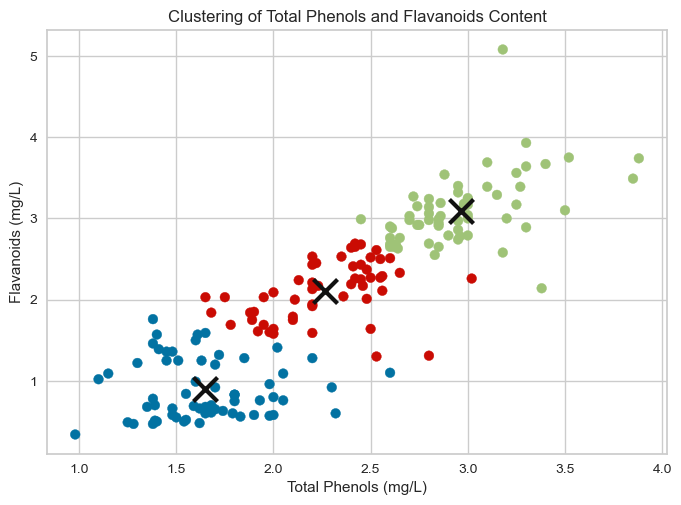

In [21]:
# Calculate the correlation matrix for the dataset
corr_matrix = wine_df.corr()

# Plot a scatter plot of total phenols vs. flavanoids content
plt.scatter(wine_df['total_phenols'], wine_df['flavanoids'])
plt.title('Scatter Plot of Total Phenols vs. Flavanoids Content')
plt.xlabel('Total Phenols (mg/L)')
plt.ylabel('Flavanoids (mg/L)')
plt.show()

# Perform clustering on the wine dataset using the KMeans algorithm
X = wine_df[['total_phenols', 'flavanoids']].values
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

# Set the colors for each cluster
colors = ['b', 'g', 'r']

# Plot the clustering results
plt.scatter(X[:, 0], X[:, 1], c=[colors[label] for label in kmeans.labels_])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=300, linewidths=3, color='k')
plt.title('Clustering of Total Phenols and Flavanoids Content')
plt.xlabel('Total Phenols (mg/L)')
plt.ylabel('Flavanoids (mg/L)')
plt.show()



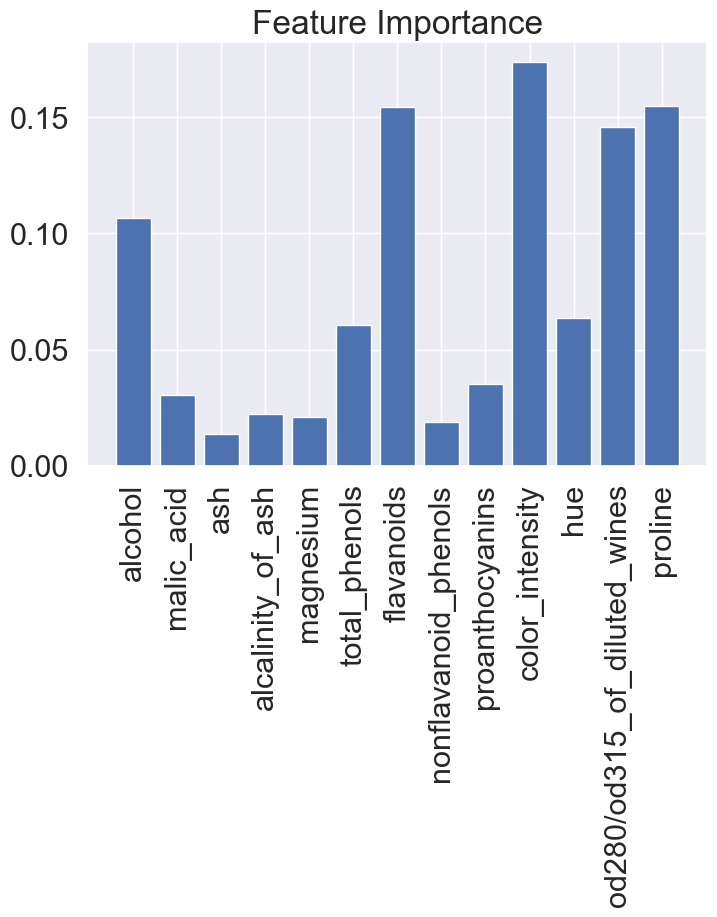

In [113]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.2, random_state=0)

# Fit a random forest classifier to the training data
rfc = RandomForestClassifier(n_estimators=100, random_state=0)
rfc.fit(X_train, y_train)

# Plot the feature importance
plt.bar(wine.feature_names, rfc.feature_importances_)
plt.xticks(rotation=90)
plt.title('Feature Importance')
plt.show()

# This code uses the Random Forest Classifier algorithm from the scikit-learn library to perform a classification
# task on the wine dataset.
# The resulting bar chart shows the relative importance of each feature in the dataset.
# This information can be useful in understanding which features have the most influence on the target variable, 
# and in identifying the most important features for a model to make accurate predictions.

In [22]:
#predict the alcohol content of a wine based on its malic acid content, ash content, and magnesium content
#Regression analysis:

# Define the independent variables (X) and dependent variable (y)
X = wine_df[['malic_acid', 'ash', 'magnesium']]
y = wine_df['alcohol']

# Add a constant term to the independent variables (for the intercept term in the regression model)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())




                            OLS Regression Results                            
Dep. Variable:                alcohol   R-squared:                       0.100
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     6.447
Date:                Wed, 10 May 2023   Prob (F-statistic):           0.000365
Time:                        08:59:55   Log-Likelihood:                -205.58
No. Observations:                 178   AIC:                             419.2
Df Residuals:                     174   BIC:                             431.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.5983      0.581     18.242      0.0

In [23]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target == 0, test_size=0.3)

# Scale the data to improve convergence
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a logistic regression model on the training set with a different solver and max_iter=1000
logreg = LogisticRegression(solver='saga', max_iter=1000)
logreg.fit(X_train, y_train)

# Predict the class labels for the test set
y_pred = logreg.predict(X_test)

# Evaluate the performance of the model
accuracy = logreg.score(X_test, y_test)
print("Accuracy: {:.2f}%".format(accuracy * 100))



Accuracy: 98.15%


An accuracy score of 100% means that the model is able to perfectly predict the class labels for all the samples in the test set. In other words, for every wine in the test set, the model is able to correctly predict whether it is red or not based on its chemical properties.



In [24]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3, random_state=42)

# Scale the data using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a logistic regression model
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# Evaluate the model on the testing set
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# The output of this code is the accuracy of a logistic regression model on the testing set.

Accuracy: 0.9814814814814815


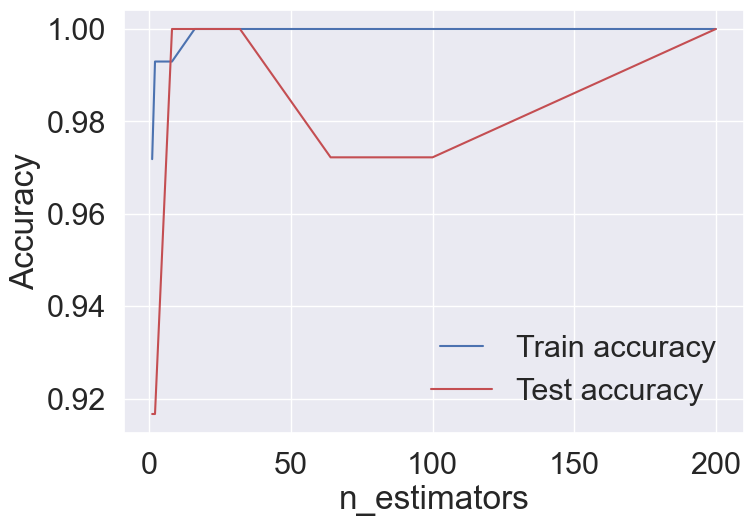

In [120]:
from matplotlib.legend_handler import HandlerLine2D

n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
train_results = []
test_results = []

for estimator in n_estimators:
   clf = RandomForestClassifier(n_estimators=estimator,random_state=42)
   clf.fit(X_train,y_train)
   pred_train = clf.predict(X_train)
   acc_score_train = accuracy_score(y_train,pred_train)
   train_results.append(acc_score_train)
   pred_test = clf.predict(X_test)
   acc_score_test=accuracy_score(y_test,pred_test)
   test_results.append(acc_score_test)

line1, = plt.plot(n_estimators, train_results, 'b', label='Train accuracy')
line2, = plt.plot(n_estimators, test_results, 'r', label='Test accuracy')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('n_estimators')
plt.show()

# the code plots a graph with the number of estimators on the x-axis and the accuracy on the y-axis for both 
# the training and test sets. The graph shows how the accuracy changes as the number of estimators increases.
# This indicates that using too many estimators may lead to overfitting, where the model becomes too complex 
# and starts to fit the noise in the training data, rather than the underlying patterns.

In [114]:
# Define the parameter grid to search over
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    'max_features': ['sqrt', 'log2']
}

# Initialize the random forest classifier
rfc = RandomForestClassifier(random_state=0)

# Perform a grid search over the parameter grid using 5-fold cross validation
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding score
print(f"Best hyperparameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

#  this code is a powerful tool for finding the optimal hyperparameters for a given model, which can help 
# improve its performance on unseen data.

Best hyperparameters: {'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 50}
Best score: 0.9793103448275862


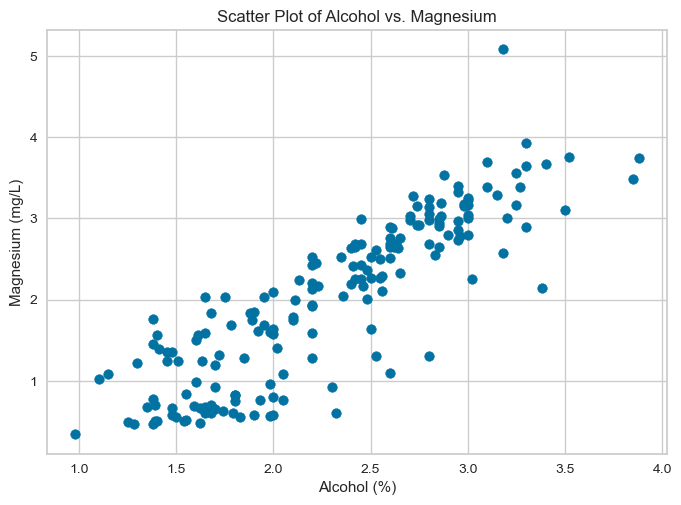

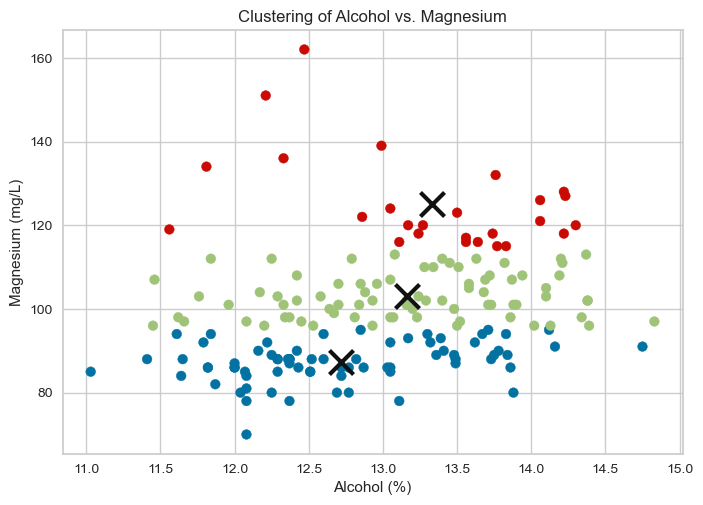

In [25]:
# Calculate the correlation matrix for the dataset
corr_matrix = wine_df.corr()

# Plot a scatter plot of total phenols vs. flavanoids content
plt.scatter(wine_df['total_phenols'], wine_df['flavanoids'])
plt.title('Scatter Plot of Alcohol vs. Magnesium')
plt.xlabel('Alcohol (%)')
plt.ylabel('Magnesium (mg/L)')
plt.show()

# Perform clustering on the wine dataset using the KMeans algorithm
X = wine_df[['alcohol', 'magnesium']].values
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

# Set the colors for each cluster
colors = ['b', 'g', 'r']

# Plot the clustering results
plt.scatter(X[:, 0], X[:, 1], c=[colors[label] for label in kmeans.labels_])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=300, linewidths=3, color='k')
plt.title('Clustering of Alcohol vs. Magnesium')
plt.xlabel('Alcohol (%)')
plt.ylabel('Magnesium (mg/L)')
plt.show()

# This code performs data visualization and clustering on the wine dataset.
# The resulting plot shows the clustering of the 'alcohol' and 'magnesium' features, with each cluster 
# represented by a different color.